In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline
from scipy.stats import spearmanr

In [3]:
df = pd.read_excel("Ratings.xlsx")
df.head()
df = df.sort_values(by=["conc(w1)", "conc(w2)"], axis=0 )
df.head()

,word 1,word 2,sõna 1,sõna 2,Annotator 1,Annotator 2,Annotator 3,Annotator 4,Average,SimLex999,POS,conc(w1),conc(w2)
475,belief,concept,uskumus,mõiste,0,0,0,1,0.25,5.08,N,1.19,1.41
350,belief,opinion,uskumus,arvamus,4,6,8,9,6.75,7.70,N,1.19,1.93
701,belief,impression,uskumus,mulje,2,0,3,6,2.75,5.95,N,1.19,2.23
715,belief,flower,uskumus,lill,0,0,0,0,0.00,0.40,N,1.19,5.00
59,essential,necessary,hädavajalik,vajalik,7,7,6,9,7.25,8.97,A,1.52,1.80


In [4]:
# Filtering the dataframe based on POS and also concreteness
nouns = df[df["POS"]=="N"]
verbs = df[df["POS"]=="V"]
adj = df[df["POS"]=="A"]
conc = df.sort_values(by=["conc(w1)", "conc(w2)"], axis=0 )[749:]
abst = df.sort_values(by=["conc(w1)", "conc(w2)"], axis=0)[:250]


In [6]:
# Calculating inter-annotator agreement on those subsets
n1 = spearmanr(nouns["Annotator 1"], nouns["Annotator 2"])[0]
n2 = spearmanr(nouns["Annotator 1"], nouns["Annotator 3"])[0]
n3 = spearmanr(nouns["Annotator 1"], nouns["Annotator 4"])[0]
n4 = spearmanr(nouns["Annotator 2"], nouns["Annotator 3"])[0]
n5 = spearmanr(nouns["Annotator 2"], nouns["Annotator 4"])[0]
n6 = spearmanr(nouns["Annotator 3"], nouns["Annotator 4"])[0]
n_avg = (n1+n2+n3+n4+n5+n6)/6

n1 = spearmanr(verbs["Annotator 1"], verbs["Annotator 2"])[0]
n2 = spearmanr(verbs["Annotator 1"], verbs["Annotator 3"])[0]
n3 = spearmanr(verbs["Annotator 1"], verbs["Annotator 4"])[0]
n4 = spearmanr(verbs["Annotator 2"], verbs["Annotator 3"])[0]
n5 = spearmanr(verbs["Annotator 2"], verbs["Annotator 4"])[0]
n6 = spearmanr(verbs["Annotator 3"], verbs["Annotator 4"])[0]
v_avg = (n1+n2+n3+n4+n5+n6)/6

n1 = spearmanr(adj["Annotator 1"], adj["Annotator 2"])[0]
n2 = spearmanr(adj["Annotator 1"], adj["Annotator 3"])[0]
n3 = spearmanr(adj["Annotator 1"], adj["Annotator 4"])[0]
n4 = spearmanr(adj["Annotator 2"], adj["Annotator 3"])[0]
n5 = spearmanr(adj["Annotator 2"], adj["Annotator 4"])[0]
n6 = spearmanr(adj["Annotator 3"], adj["Annotator 4"])[0]
a_avg = (n1+n2+n3+n4+n5+n6)/6


n1 = spearmanr(conc["Annotator 1"], conc["Annotator 2"])[0]
n2 = spearmanr(conc["Annotator 1"], conc["Annotator 3"])[0]
n3 = spearmanr(conc["Annotator 1"], conc["Annotator 4"])[0]
n4 = spearmanr(conc["Annotator 2"], conc["Annotator 3"])[0]
n5 = spearmanr(conc["Annotator 2"], conc["Annotator 4"])[0]
n6 = spearmanr(conc["Annotator 3"], conc["Annotator 4"])[0]
c_avg = (n1+n2+n3+n4+n5+n6)/6

n1 = spearmanr(abst["Annotator 1"], abst["Annotator 2"])[0]
n2 = spearmanr(abst["Annotator 1"], abst["Annotator 3"])[0]
n3 = spearmanr(abst["Annotator 1"], abst["Annotator 4"])[0]
n4 = spearmanr(abst["Annotator 2"], abst["Annotator 3"])[0]
n5 = spearmanr(abst["Annotator 2"], abst["Annotator 4"])[0]
n6 = spearmanr(abst["Annotator 3"], abst["Annotator 4"])[0]
ab_avg = (n1+n2+n3+n4+n5+n6)/6





In [8]:
# Adding these to a dataframe to use it for creating graph
data = [['All', 0.77], ['Concrete', round(c_avg, 2)], ['Abstract', round(ab_avg, 2)], ['Adjective', round(a_avg, 2)], ['Noun', round(n_avg,2)], ['Verb', round(v_avg, 2)]] 
  
df = pd.DataFrame(data, columns = ['ESL-999 subset', 'Inter-Annotator Agreement']) 
  

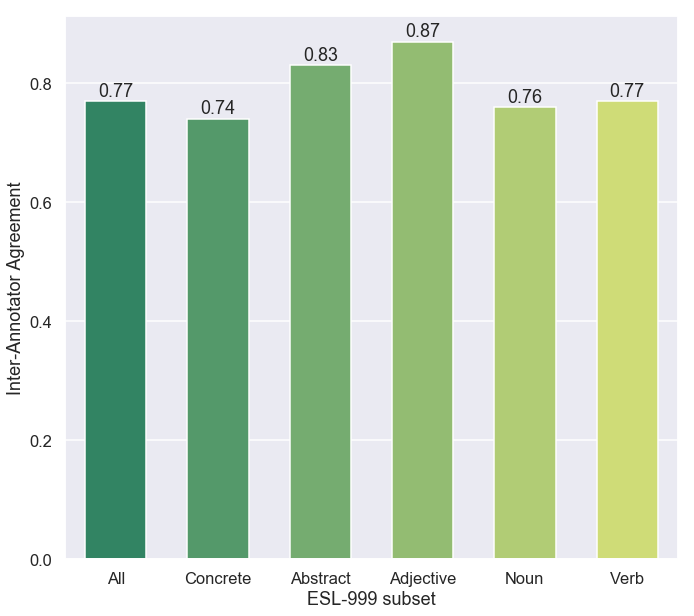

In [9]:
# Creating a plot for the inter-annotator agreement on different POS and concreteness

plt.figure(figsize=(11, 10))
plot = sns.barplot(x='ESL-999 subset', y='Inter-Annotator Agreement',data=df, palette=("summer"))

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
    
    
columncounts = [60,60,60,60, 60, 60]

# Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(plot.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)
plt.savefig("subsets.png")

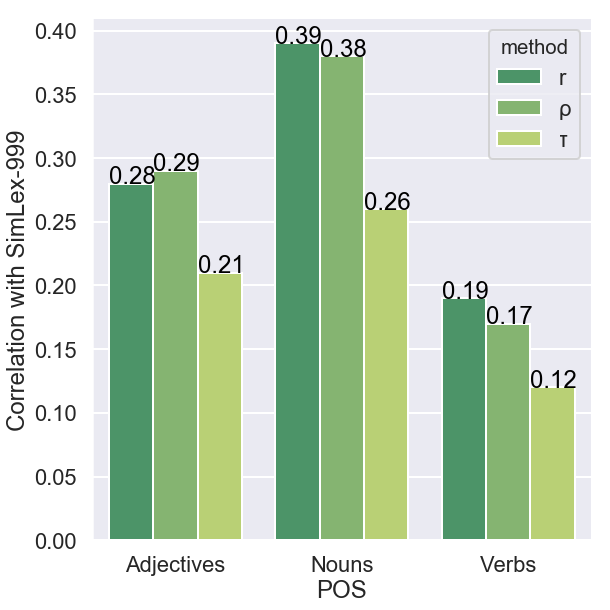

In [16]:

# Filtering data set based on the POS and creating a plot to show how the POS affects the models ability to estimate similarity 
# only comparing SimLex-999 scores
df = pd.read_excel("pos.xlsx")
sns.set()
sns.set_context("poster")

plot = sns.catplot(x='POS', y='Correlation with SimLex-999', height=9,hue='method', data=df, kind='bar', legend_out=False, palette=("summer"))

for i in range(1):
    ax1 = plot.facet_axis(0,i)
    for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() , p.get_height() * 1, '{0:.2f}'.format(p.get_height()), color='black', rotation='horizontal', size='medium') 


                

#plot.savefig("pos_simlex.png")

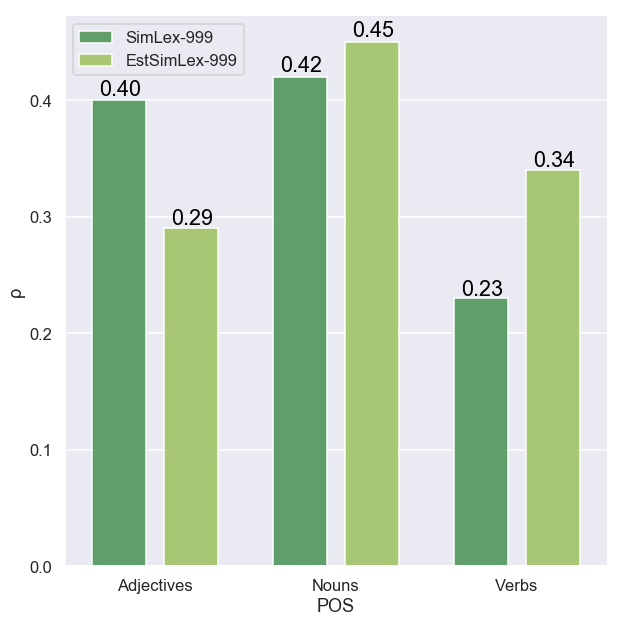

In [21]:
# Same as the previous, but only spearman correlation is added to the plot
df = pd.read_excel("pos.xlsx", sheet_name="Sheet2")
sns.set()
sns.set_context("talk")
plot = sns.catplot(x='POS', y='ρ',height=9, hue='Similarity set', data=df, kind='bar', legend_out=False, palette=("summer"))
for i in range(1):
    ax1 = plot.facet_axis(0,i)
    for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() +0.09, p.get_height() * 1.01, '{0:.2f}'.format(p.get_height()), color='black', rotation='horizontal', size='large') 

columncounts = [30,30,30,30, 30, 30]
plot.ax.legend(loc=2)
# Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(plot.ax.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)
plot.savefig("pos_simlex_all.png")

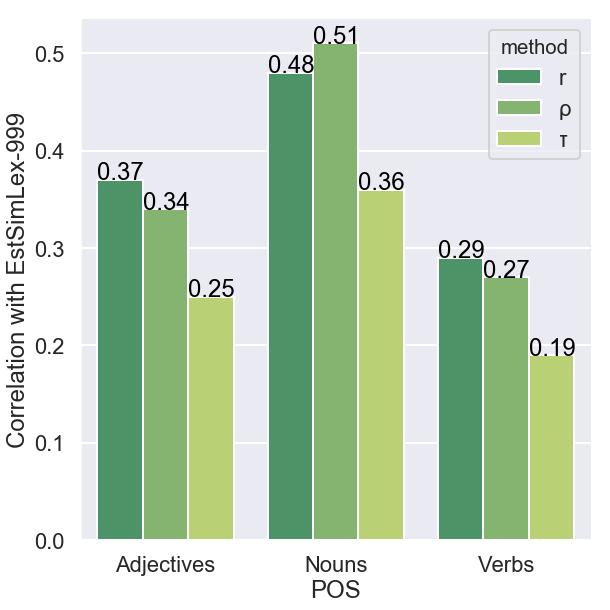

In [24]:
# Filtering data set based on the POS and creating a plot to show how the POS affects the models ability to estimate similarity
# comparing EstSimLex-999 scores
df = pd.read_excel("pos.xlsx")
sns.set()
sns.set_context("poster")
plot = sns.catplot(x='POS', y='Correlation with EstSimLex-999',height=9, hue='method', data=df, kind='bar', legend_out=False, palette=("summer"))
for i in range(1):
    ax1 = plot.facet_axis(0,i)
    for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() , p.get_height() * 1, '{0:.2f}'.format(p.get_height()), color='black', rotation='horizontal', size='medium') 


plot.savefig("pos_estsimlex.png")

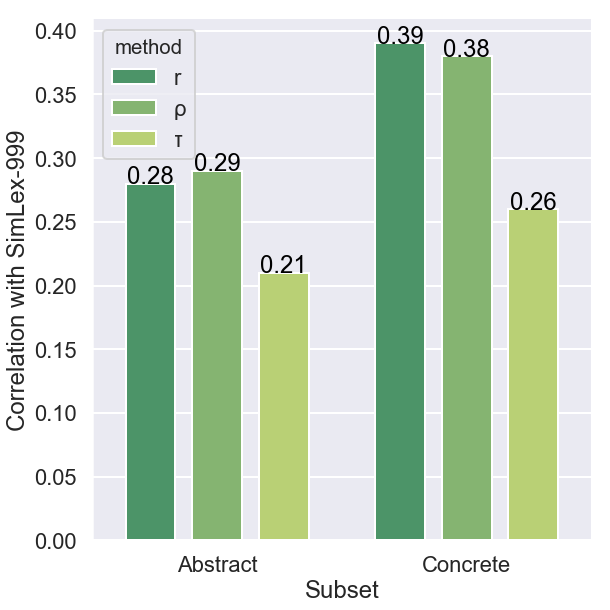

In [26]:
# Filtering data set based on the concreteness and creating a plot to show how the concreteness affects the models ability to estimate similarity
# for SimLex-999 similarity scores
df = pd.read_excel("pos.xlsx", sheet_name="Sheet4")
plot = sns.catplot(x='Subset', y='Correlation with SimLex-999', hue='method',height=9, data=df, kind='bar', legend_out=False, palette=("summer"))
for i in range(1):
    ax1 = plot.facet_axis(0,i)
    for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() +0.04, p.get_height() * 1, '{0:.2f}'.format(p.get_height()), color='black', rotation='horizontal', size='medium') 
columncounts = [20,20,20,20, 20, 20]

# Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(plot.ax.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

plot.savefig("ca_simlex_s.png")

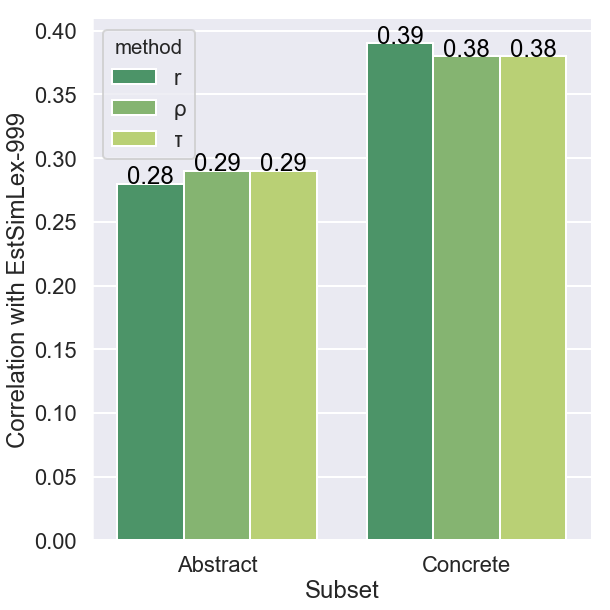

In [28]:
df = pd.read_excel("pos.xlsx", sheet_name="Sheet4")
plot = sns.catplot(x='Subset', y='Correlation with EstSimLex-999',height=9, hue='method', data=df, kind='bar', legend_out=False, palette=("summer"))
for i in range(1):
    ax1 = plot.facet_axis(0,i)
    for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() +0.04, p.get_height() * 1, '{0:.2f}'.format(p.get_height()), color='black', rotation='horizontal', size='medium') 


plot.savefig("ca_simlex_e.png")

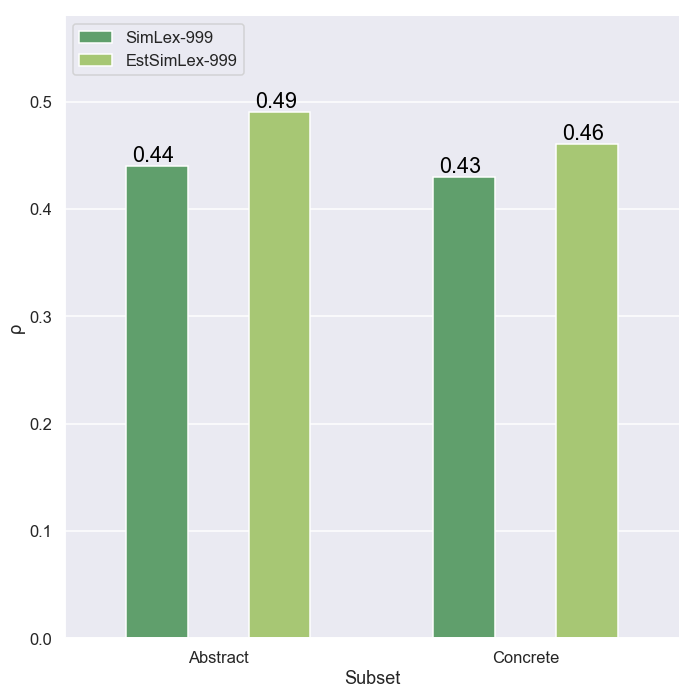

In [31]:
df = pd.read_excel("pos.xlsx", sheet_name="Sheet3")
sns.set()
sns.set_context("talk")

plot = sns.catplot(x='Subset', y='ρ', height=10,hue='Similarity set', data=df, kind='bar', legend_out=False, palette=("summer"))
plot.ax.set(ylim=(0, 0.58))
for i in range(1):
    ax1 = plot.facet_axis(0,i)
    for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() +0.12, p.get_height() * 1.01, '{0:.2f}'.format(p.get_height()), color='black', rotation='horizontal', size='large') 

columncounts = [20,20,20,20]
#plot.despine(left=True)
#plt.legend(loc='lower right')

plot.ax.legend(loc=2)
# Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(plot.ax.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)
plot.savefig("ca_simlex_all.png")